In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load the data
socio_df = pd.read_csv('Chicago Sociodemographics Zipcode.csv')
covid_df = pd.read_csv('Data/Covid Data/Medical_Examiner_Case_Archive_-_COVID-19_Related_Deaths.csv')
display(socio_df.head())
display(covid_df.head())

,Unnamed: 0,Zipcode,Population,Median age,Male(%),Female(%),White(%),Black(%),Native(%),Asian(%),...,Some College(%),Bachelor's(%),Post-grad(%),Foriegn Born Population(%),Europe(%),Asia(%),Africa(%),Oceania(%),Latin America(%),North America(%)
0,0,60647,85658,32.2,49.75,50.25,48.50,4.72,0.02,3.96,...,15.28,35.73,21.65,17.10,14.76,14.11,1.67,0.68,66.31,2.47
1,1,60639,88515,34.6,49.90,50.10,8.07,13.24,0.12,1.39,...,24.16,9.32,4.24,32.87,4.69,2.99,0.61,0.00,91.67,0.03
2,2,60707,42434,40.0,47.33,52.67,46.85,6.63,0.19,3.31,...,30.45,16.73,11.11,26.15,42.45,11.93,0.98,0.00,44.29,0.34
3,3,60622,52957,32.2,50.64,49.36,64.44,5.35,0.00,4.53,...,12.86,44.90,26.79,13.30,38.17,19.04,1.60,0.50,38.03,2.65
4,4,60651,63679,33.9,46.37,53.63,5.00,53.02,0.11,0.28,...,30.47,8.03,5.19,13.92,1.55,2.46,0.89,0.00,94.89,0.21


,Case Number,Date of Incident,Date of Death,Age,Gender,Race,Latino,Residence City,Residence Zip,Manner of Death,...,Commissioner District,Incident Address,Incident City,Incident Zip Code,longitude,latitude,location,OBJECTID,Chicago Ward,Chicago Community Area
0,ME2020-02118,04/02/2020 10:35:00 AM,04/06/2020 01:26:00 PM,75.0,Male,White,True,Medinah,60157,NATURAL,...,NaN,22 W294 IRVING PARK ROAD,MEDINAH,60157,NaN,NaN,NaN,34933,NaN,NaN
1,ME2020-02532,03/25/2020 09:00:00 AM,04/11/2020 05:45:00 PM,75.0,Female,Asian,False,Chicago,60616,NATURAL,...,NaN,2732 North Hampton Court,CHICAGO,60614,NaN,NaN,NaN,35295,NaN,NaN
2,ME2020-02887,04/11/2020 12:00:00 AM,04/15/2020 08:26:00 PM,80.0,Male,Black,False,Chicago,60640,NATURAL,...,NaN,4920 N. Kenmore/ Uptown Health Ctr.,CHICAGO,60640,NaN,NaN,NaN,35680,NaN,NaN
3,ME2020-03178,04/06/2020 12:00:00 AM,04/19/2020 07:03:00 PM,69.0,Female,White,False,Buffalo Grove,60089,NATURAL,...,NaN,1083 Auburn Lane,BUFFALO GROVE,60089,NaN,NaN,NaN,35942,NaN,NaN
4,ME2020-04107,04/15/2020 03:00:00 PM,04/29/2020 09:52:00 PM,74.0,Female,White,False,Deerfield,60015,NATURAL,...,NaN,1167 WAUKEGAN ROAD,DEERFIELD,60015,NaN,NaN,NaN,36856,NaN,NaN


## 1. Data cleaning


In [3]:
print("Original data shape:")
print(covid_df.shape)
#print(covid_df['Residence Zip'].apply(lambda x: isinstance(x,float)))

# get the data in Chicago area
covid_df = covid_df[covid_df['Residence City'] == "Chicago"]

# pick the cases that have the residence zipcode match the zipcode in social demographic data
cases = pd.DataFrame(data=covid_df, columns=['Residence Zip', 'Age','Latino', 'Gender'])
zip_code = socio_df['Zipcode'].apply(lambda x: str(x)).tolist()
cases = cases[cases['Residence Zip'].apply(lambda x: str(x) in zip_code)]
num_cases = cases['Residence Zip'].value_counts().to_frame()
num_cases['Zip'] = num_cases.index

# join the number of cases for each zip code
num_cases = num_cases.rename(columns={'Residence Zip':'Number of cases','Zip':'Zip'})
socio_df['Zipcode'] = socio_df['Zipcode'].apply(lambda x: str(x))
df = pd.merge(num_cases, socio_df, how='inner',left_on='Zip',right_on='Zipcode')
del df['Zip']
del df['Unnamed: 0']
df

Original data shape:
(15171, 28)


,Number of cases,Zipcode,Population,Median age,Male(%),Female(%),White(%),Black(%),Native(%),Asian(%),...,Some College(%),Bachelor's(%),Post-grad(%),Foriegn Born Population(%),Europe(%),Asia(%),Africa(%),Oceania(%),Latin America(%),North America(%)
0,314,60628,65008,39.4,45.87,54.13,2.42,92.10,0.03,0.17,...,37.73,12.95,8.75,2.79,4.35,5.51,17.52,0.00,72.40,0.22
1,311,60623,77732,32.9,49.35,50.65,3.85,28.58,0.02,0.27,...,22.00,8.82,3.22,30.44,0.39,0.79,0.22,0.10,98.32,0.17
2,298,60629,107930,31.3,48.81,51.19,7.08,18.07,0.04,0.55,...,22.73,7.81,3.28,29.71,3.92,2.31,0.41,0.05,93.20,0.10
3,282,60639,88515,34.6,49.90,50.10,8.07,13.24,0.12,1.39,...,24.16,9.32,4.24,32.87,4.69,2.99,0.61,0.00,91.67,0.03
4,253,60620,68761,39.4,45.13,54.87,1.16,94.82,0.06,0.34,...,37.81,12.03,6.23,2.27,0.64,14.33,13.82,0.06,71.15,0.00
5,251,60649,47084,38.1,44.63,55.37,3.16,92.42,0.14,0.35,...,39.43,14.77,11.35,4.26,8.82,7.83,38.24,0.00,44.02,1.10
6,244,60632,86715,31.4,51.66,48.34,8.90,1.08,0.03,6.66,...,18.16,8.69,2.49,40.08,4.93,12.17,0.77,0.00,82.11,0.01
7,242,60625,78820,34.7,48.93,51.07,46.30,4.45,0.02,11.74,...,16.64,32.09,19.52,31.28,16.04,34.37,3.85,0.12,45.46,0.16
8,230,60634,75604,40.6,48.48,51.52,52.68,1.91,0.11,5.13,...,30.49,17.30,8.45,33.72,49.13,12.61,2.10,0.28,35.73,0.15
9,224,60617,82101,36.7,45.08,54.92,5.88,55.07,0.05,0.24,...,30.94,12.42,6.81,13.26,4.03,1.70,6.64,0.00,87.63,0.00


## 2. EDA

In [18]:
# Run descriptive statistics
new_df = pd.DataFrame(cases[['Age']].describe())
display(new_df)

,Age
count,7217.00000
mean,70.89303
std,15.25965
min,0.00000
25%,61.00000
50%,72.00000
75%,82.00000
max,109.00000


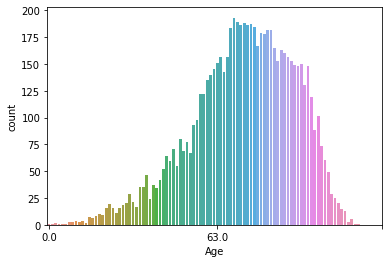

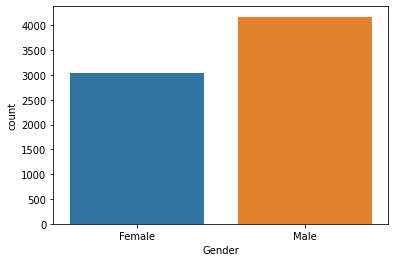

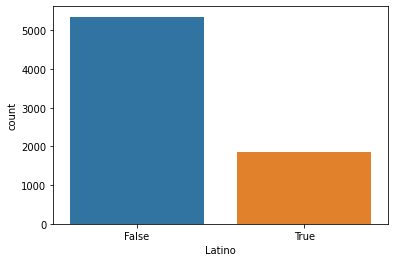

In [5]:
# simple data visualizations
sns.countplot(data=cases, x='Age')
plt.xticks([0,50,99])
plt.show()
sns.countplot(data=cases, x='Gender')
plt.show()
sns.countplot(data=cases, x='Latino')
plt.show()

## 3. Machine learning model

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score


In [20]:
socio_df = pd.read_csv('Chicago Sociodemographics Zipcode.csv')

,Number of cases,Zipcode,Population,Median age,Male(%),Female(%),White(%),Black(%),Native(%),Asian(%),...,Some College(%),Bachelor's(%),Post-grad(%),Foriegn Born Population(%),Europe(%),Asia(%),Africa(%),Oceania(%),Latin America(%),North America(%)
0,314,60628,65008,39.4,45.87,54.13,2.42,92.10,0.03,0.17,...,37.73,12.95,8.75,2.79,4.35,5.51,17.52,0.00,72.40,0.22
1,311,60623,77732,32.9,49.35,50.65,3.85,28.58,0.02,0.27,...,22.00,8.82,3.22,30.44,0.39,0.79,0.22,0.10,98.32,0.17
2,298,60629,107930,31.3,48.81,51.19,7.08,18.07,0.04,0.55,...,22.73,7.81,3.28,29.71,3.92,2.31,0.41,0.05,93.20,0.10
3,282,60639,88515,34.6,49.90,50.10,8.07,13.24,0.12,1.39,...,24.16,9.32,4.24,32.87,4.69,2.99,0.61,0.00,91.67,0.03
4,253,60620,68761,39.4,45.13,54.87,1.16,94.82,0.06,0.34,...,37.81,12.03,6.23,2.27,0.64,14.33,13.82,0.06,71.15,0.00
5,251,60649,47084,38.1,44.63,55.37,3.16,92.42,0.14,0.35,...,39.43,14.77,11.35,4.26,8.82,7.83,38.24,0.00,44.02,1.10
6,244,60632,86715,31.4,51.66,48.34,8.90,1.08,0.03,6.66,...,18.16,8.69,2.49,40.08,4.93,12.17,0.77,0.00,82.11,0.01
7,242,60625,78820,34.7,48.93,51.07,46.30,4.45,0.02,11.74,...,16.64,32.09,19.52,31.28,16.04,34.37,3.85,0.12,45.46,0.16
8,230,60634,75604,40.6,48.48,51.52,52.68,1.91,0.11,5.13,...,30.49,17.30,8.45,33.72,49.13,12.61,2.10,0.28,35.73,0.15
9,224,60617,82101,36.7,45.08,54.92,5.88,55.07,0.05,0.24,...,30.94,12.42,6.81,13.26,4.03,1.70,6.64,0.00,87.63,0.00
